Sankey Chart

In [13]:
import pandas as pd
import plotly.graph_objects as go
from collections import defaultdict

# CSV-Datei laden
csv_file = './Document_of_all_relevant_analysis.csv'
csv_rap = './Analysis_Folder/BERT/Rap/topics_RAP_BERT_6:22:07_MiniLM.csv'

try:
    data = pd.read_csv(csv_file, encoding='utf-8',on_bad_lines='skip')
    data_bert = pd.read_csv(csv_rap, encoding='utf-8',on_bad_lines='skip')

except UnicodeDecodeError:
    # Alternative Kodierung verwenden
    data = pd.read_csv(csv_file, encoding='ISO-8859-1',on_bad_lines='skip')

print(data.head())
print(data_bert.head())# Zeigt die ersten Zeilen, um zu prüfen, ob die Daten korrekt geladen wurden
print(data_bert.columns)


# Dictionary zur Speicherung der Summenwerte
key_value = defaultdict(float)

def get_back_Topic_list(data):
    
    # Extrahieren und Summieren der Werte
    for topic in data['Topic']:
        entries = topic.split(' + ')
        for entry in entries:
            value, key = entry.split('*')
            key = key.strip('"')
            key_value[key] += float(value)

    # Umwandlung des Ergebnisses in ein Dictionary
    return dict(key_value)

data_file_topic_list = get_back_Topic_list(data)

import json

output_file = './key_value_output.json'

with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(data_file_topic_list, f, ensure_ascii=False, indent=4)

#data_file_topic_list_rap = get_back_Topic_list(data_bert)


# Knoten erstellen
all_nodes = list(set(data['Topic']).union(set(data_bert['Topic'])))
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Quellen, Ziele und Werte zu Indizes konvertieren
data['source_idx'] = data['Topic'].map(node_indices)
data['target_idx'] = data['Topic'].map(node_indices)

# Sankey-Diagramm erstellen
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=data['source_idx'],
        target=data['target_idx'],
        value=data['value']
    )
)])

# Titel und Layout anpassen
fig.update_layout(title_text="Sankey-Diagramm: LDA vs. BERT", font_size=12)
fig.show()


  Method Genre Decade                                              Topic
0    LDA   Rap    70s  0.022*"rock" + 0.011*"time" + 0.010*"love" + 0...
1    LDA   Rap    70s  0.018*"rock" + 0.010*"go" + 0.010*"time" + 0.0...
2    LDA   Rap    70s  0.027*"rock" + 0.012*"time" + 0.011*"to" + 0.0...
3    LDA   Rap    70s  0.021*"rock" + 0.014*"time" + 0.011*"love" + 0...
4    LDA   Rap    70s  0.017*"rock" + 0.014*"love" + 0.010*"ya" + 0.0...
  Method Genre Decade                                              Topic
0   BERT   Rap    70s  [('im', 0.0581961536104272), ('rock', 0.049024...
1   BERT   Rap    70s  [('gil', 0.12151400023453168), ('scottheron', ...
2   BERT   Rap    80s  [('im', 0.024574168743431837), ('got', 0.02029...
3   BERT   Rap    80s  [('im', 0.04388046324880239), ('cause', 0.0284...
4   BERT   Rap    80s  [('beat', 0.037625331523414546), ('rock', 0.03...
Index(['Method', 'Genre', 'Decade', 'Topic'], dtype='object')


KeyError: 'value'

In [22]:
# Themen-Liste für die 2020er
topics_2020s = [
'0.006*"one" + 0.006*"state" + 0.006*"man" + 0.005*"production" + 0.004*"political"',
'0.008*"people" + 0.007*"world" + 0.006*"must" + 0.005*"new" + 0.005*"one"',
'0.011*"v" + 0.008*"2d" + 0.007*"law" + 0.006*"court" + 0.005*"defendant"',
'0.012*"v" + 0.011*"u" + 0.010*"court" + 0.006*"luke" + 0.006*"state"',
'0.007*"one" + 0.006*"know" + 0.005*"man" + 0.005*"go" + 0.005*"michael"'






]

# Dictionary zur Speicherung der Summenwerte
key_value_2020s = defaultdict(float)

# Verarbeitung der Themen
for topic in topics_2020s:
    entries = topic.split(' + ')
    for entry in entries:
        value, key = entry.split('*')
        key = key.strip('"')
        key_value_2020s[key] += float(value)

# Wichtigstes Thema bestimmen
most_important_topic_2020s = max(key_value_2020s.items(), key=lambda x: x[1])

# Ergebnis
key_value_2020s, most_important_topic_2020s


(defaultdict(float,
             {'one': 0.018,
              'state': 0.012,
              'man': 0.011,
              'production': 0.005,
              'political': 0.004,
              'people': 0.008,
              'world': 0.007,
              'must': 0.006,
              'new': 0.005,
              'v': 0.023,
              '2d': 0.008,
              'law': 0.007,
              'court': 0.016,
              'defendant': 0.005,
              'u': 0.011,
              'luke': 0.006,
              'know': 0.006,
              'go': 0.005,
              'michael': 0.005}),
 ('v', 0.023))

In [15]:
# Themen-Liste für die 2020er
from collections import defaultdict

topics_2020s = [
'0.006*"one" + 0.006*"state" + 0.006*"man" + 0.005*"production" + 0.004*"political"',
'0.008*"people" + 0.007*"world" + 0.006*"must" + 0.005*"new" + 0.005*"one"',
'0.011*"v" + 0.008*"2d" + 0.007*"law" + 0.006*"court" + 0.005*"defendant"',
'0.012*"v" + 0.011*"u" + 0.010*"court" + 0.006*"luke" + 0.006*"state"',
'0.007*"one" + 0.006*"know" + 0.005*"man" + 0.005*"go" + 0.005*"michael"'






]

def get_hottest_topic():
    # Dictionary zur Speicherung der Summenwerte
    key_value_2020s = defaultdict(float)
    
    # Verarbeitung der Themen
    for topic in topics_2020s:
        entries = topic.split(' + ')
        for entry in entries:
            value, key = entry.split('*')
            key = key.strip('"')
            key_value_2020s[key] += float(value)
    
    # Wichtigstes Thema bestimmen
    most_important_topic_2020s = max(key_value_2020s.items(), key=lambda x: x[1])
    
    # Ergebnis
    key_value_2020s, most_important_topic_2020s


In [ ]:
# Fully Automated

In [16]:
import pandas as pd
from collections import defaultdict


# CSV-Datei erneut laden
#path ="/home/maurice/Dokumente/3rd_Semester_LiU/TDDE16_Projekt/TDDE16_Song_Lyrics_Analysis/Analysis_Folder/LDA_BiGrams/"
#file_path = 'topics_rock_LDA_1000_11_1.csv'#


path ="/home/maurice/Dokumente/3rd_Semester_LiU/TDDE16_Projekt/TDDE16_Song_Lyrics_Analysis/Analysis_Folder/"

file_path = 'topics_misc_LDA_16_1.csv'

data = pd.read_csv(path + file_path)

# Filtern der Zeilen, die '1970s' in der entsprechenden Spalte enthalten
filtered_data_1970s = data[data.apply(lambda row: row.astype(str).str.contains('70s').any(), axis=1)]
filtered_data_1980s = data[data.apply(lambda row: row.astype(str).str.contains('80s').any(), axis=1)]
filtered_data_1990s= data[data.apply(lambda row: row.astype(str).str.contains('90s').any(), axis=1)]

filtered_data_2000s = data[data.apply(lambda row: row.astype(str).str.contains('00s').any(), axis=1)]
filtered_data_2010s = data[data.apply(lambda row: row.astype(str).str.contains('10s').any(), axis=1)]
filtered_data_2020s = data[data.apply(lambda row: row.astype(str).str.contains('20s').any(), axis=1)]


def get_hottest_topic(topics_2020s):
    # Dictionary zur Speicherung der Summenwerte
    key_value_2020s = defaultdict(float)
    
    # Verarbeitung der Themen
    for topic in topics_2020s:
        entries = topic.split(' + ')
        for entry in entries:
            value, key = entry.split('*')
            key = key.strip('"')
            key_value_2020s[key] += float(value)

        # Ermittlung des wichtigsten und zweithöchsten Themas
    
    sorted_topics_2020s = sorted(key_value_2020s.items(), key=lambda x: x[1], reverse=True)
    
    most_important_topic_2020s = sorted_topics_2020s[0] if len(sorted_topics_2020s) > 0 else None
    
    second_most_important_topic_2020s = sorted_topics_2020s[1] if len(sorted_topics_2020s) > 1 else None
    
    # Ergebnis
    #return key_value_2020s, most_important_topic_2020s                                                        
    return most_important_topic_2020s,second_most_important_topic_2020s


print("70s", get_hottest_topic(filtered_data_1970s["Topic"]))
print("80s", get_hottest_topic(filtered_data_1980s["Topic"]))
print("90s", get_hottest_topic(filtered_data_1990s["Topic"]))
print("00s", get_hottest_topic(filtered_data_2000s["Topic"]))
print("10s", get_hottest_topic(filtered_data_2010s["Topic"]))
print("20s", get_hottest_topic(filtered_data_2020s["Topic"]))



# Gefilterte Daten anzeigen

70s (('michael', 0.029), ('time', 0.023000000000000003))
80s (('time', 0.026000000000000002), ('people', 0.023000000000000003))
90s (('ross', 0.037), ('monica', 0.032))
00s (('love', 0.032), ('time', 0.031000000000000003))
10s (('time', 0.032), ('people', 0.028))
20s (('ft', 0.066), ('love', 0.032))


BERT

In [59]:
from collections import defaultdict
import pandas as pd

# CSV-Datei laden
path = "/home/maurice/Dokumente/3rd_Semester_LiU/TDDE16_Projekt/TDDE16_Song_Lyrics_Analysis/Analysis_Folder/BERT/Rap/"
file_path = 'topics_RAP_BERT_6:22:07_MiniLM.csv'

data = pd.read_csv(path + file_path)

# Filtern der Zeilen nach Dekade
filtered_data_1970s = data[data.apply(lambda row: row.astype(str).str.contains('70s').any(), axis=1)]
filtered_data_1980s = data[data.apply(lambda row: row.astype(str).str.contains('80s').any(), axis=1)]
filtered_data_1990s = data[data.apply(lambda row: row.astype(str).str.contains('90s').any(), axis=1)]
filtered_data_2000s = data[data.apply(lambda row: row.astype(str).str.contains('00s').any(), axis=1)]
filtered_data_2010s = data[data.apply(lambda row: row.astype(str).str.contains('10s').any(), axis=1)]
filtered_data_2020s = data[data.apply(lambda row: row.astype(str).str.contains('20s').any(), axis=1)]

# Angepasste Funktion für neue Struktur
def get_hottest_topic(topics):
    key_value = defaultdict(float)
    
    for topic_list in topics:
        for word, value in eval(topic_list):  # `eval` konvertiert die String-Repräsentation in eine Liste von Tupeln
            key_value[word] += value
    
    sorted_topics = sorted(key_value.items(), key=lambda x: x[1], reverse=True)
    most_important_topic = (sorted_topics[0][0], round(sorted_topics[0][1], 3)) if len(sorted_topics) > 0 else None
    second_most_important_topic = (sorted_topics[1][0], round(sorted_topics[1][1], 3)) if len(sorted_topics) > 1 else None
    
    return str(most_important_topic).strip("(").strip(")"), str(second_most_important_topic).strip("(").strip(")")

# Ergebnisse für jede Dekade
print("70s", get_hottest_topic(filtered_data_1970s["Topic"]))
print("80s", get_hottest_topic(filtered_data_1980s["Topic"]))
print("90s", get_hottest_topic(filtered_data_1990s["Topic"]))
print("00s", get_hottest_topic(filtered_data_2000s["Topic"]))
print("10s", get_hottest_topic(filtered_data_2010s["Topic"]))
print("20s", get_hottest_topic(filtered_data_2020s["Topic"]))


70s ("'gil', 0.122", "'scottheron', 0.121")
80s ("'im', 0.308", "'got', 0.164")
90s ("'im', 0.328", "'got', 0.215")
00s ("'im', 0.393", "'dont', 0.212")
10s ("'hamilton', 0.217", "'burr', 0.164")
20s ("'yeah', 0.16", "'im', 0.155")


<h2>Plotting </h2>

BERT

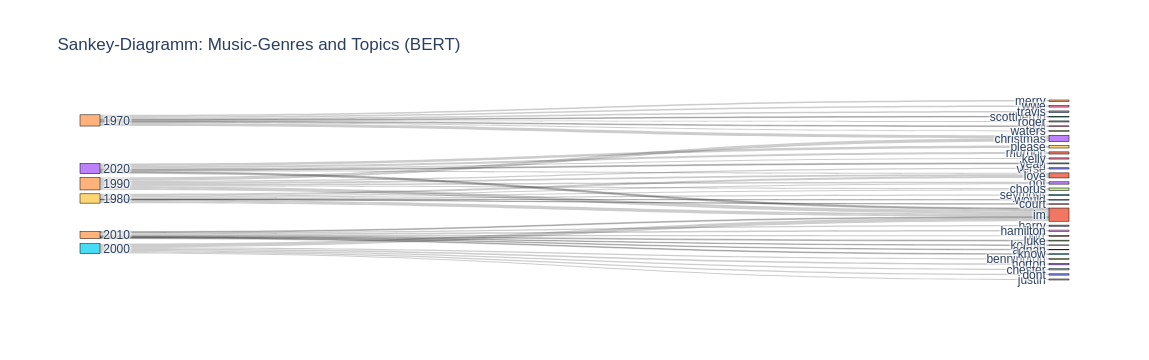

In [3]:
import pandas as pd
import plotly.graph_objects as go

# Daten vorbereiten (basierend auf der Struktur)
data = pd.DataFrame({
    'Decade': ['1970', '1980', '1990', '2000', '2010', '2020'],
    'Rap': [
        [("gil", 0.122), ("scottheron", 0.121)],
        [("im", 0.308), ("got", 0.164)],
        [("im", 0.328), ("got", 0.215)],
        [("im", 0.393), ("dont", 0.212)],
        [("hamilton", 0.217), ("burr", 0.164)],
        [("yeah", 0.16), ("im", 0.155)]
    ],
    'Pop': [
        [("christmas", 0.484), ("merry", 0.255)],
        [("love", 0.32), ("seymour", 0.212)],
        [("love", 0.293), ("christmas", 0.208)],
        [("justin", 0.166)],
        [("harry", 0.182), ("know", 0.124)],
        [("love", 0.214)]
    ],
    'Rock': [
        [("roger", 0.173), ("waters", 0.17)],
        [("im", 0.221), ("chorus", 0.195)],
        [("chorus", 0.231), ("verse", 0.202)],
        [("bennington", 0.199), ("chester", 0.199)],
        [("luke", 0.143), ("im", 0.14)],
        [("kelly", 0.193), ("im", 0.189)]
    ],
    'Misc': [
        [("wwe", 0.27), ("travis", 0.245)],
        [("court", 0.06), ("would", 0.047)],
        [("christmas", 0.328), ("im", 0.221)],
        [("horton", 0.228), ("im", 0.208)],
        [("adnan", 0.098), ("koenig", 0.084)],
        [("please", 0.414), ("murdoc", 0.351)]
    ]
})

# Vorbereitung der Daten für das Sankey-Diagramm
all_nodes = set()
source = []
target = []
value = []

for column in data.columns[1:]:  # Spalten Rap, Pop, Rock, Misc
    for decade, topics in zip(data['Decade'], data[column]):
        for topic, val in topics:
            all_nodes.add(decade)
            all_nodes.add(topic)
            source.append(decade)
            target.append(topic)
            value.append(val)

# Knoten und ihre Indizes erstellen
all_nodes = list(all_nodes)
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Indizes für Quelle und Ziel
source_indices = [node_indices[s] for s in source]
target_indices = [node_indices[t] for t in target]

# Sankey-Diagramm erstellen
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=value
    )
)])

# Layout anpassen und Diagramm anzeigen
fig.update_layout(title_text="Sankey-Diagramm: Music-Genres and Topics (BERT)", font_size=12)
fig.show()


In [5]:
# Layout anpassen, um die Skalierung zu ändern und das Diagramm zu speichern

fig.update_layout(

    title_text="Sankey-Diagram: Music-Genres and Topics (BERT)",

    font_size=12,

    width=1000,  # Breite des Diagramms anpassen

    height=600   # Höhe des Diagramms anpassen

)

# Diagramm speichern

output_path = "sankey_diagram_music_genres.png"

fig.write_image(output_path, scale=2)  # Skalierungsfaktor für bessere Qualität

output_path

'sankey_diagram_music_genres.png'

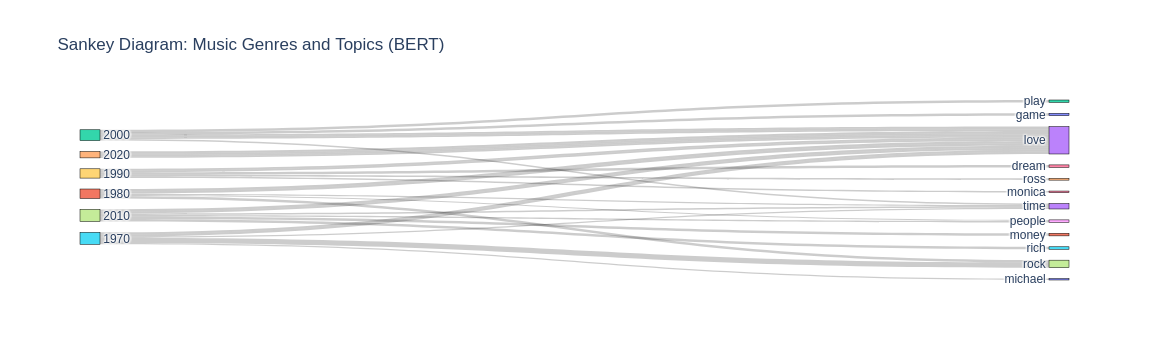

In [19]:
import plotly.graph_objects as go

data = {
    "Decade": ["1970", "1980", "1990", "2000", "2010", "2020"],
    "Rap": [
        [("rock", 0.105)],
        [("rock", 0.049)],
        [("dream", 0.052)],
        [("game", 0.049), ("play", 0.049)],
        [("money", 0.053), ("rich", 0.051)],
        [("love", 0.04)],
    ],
    "Pop": [
        [("love", 0.044)],
        [("love", 0.048)],
        [("love", 0.035)],
        [("love", 0.03)],
        [("love", 0.042)],
        [("love", 0.03)],
    ],
    "Rock": [
        [("love", 0.044)],
        [("love", 0.048)],
        [("love", 0.035)],
        [("love", 0.03)],
        [("love", 0.042)],
        [("love", 0.03)],
    ],
    "Misc": [
        [("michael", 0.029), ("time", 0.023)],
        [("time", 0.026), ("people", 0.023)],
        [("ross", 0.037), ("monica", 0.032)],
        [("love", 0.032), ("time", 0.031)],
        [("time", 0.032), ("people", 0.028)],
        [("love", 0.032)],
    ],
}

# Prepare data for Sankey Diagram
all_nodes = set()
source = []
target = []
value = []

for column in ["Rap", "Pop", "Rock", "Misc"]:  # Focus on topic columns
    for decade, topics in zip(data["Decade"], data[column]):
        for topic, val in topics:
            all_nodes.add(decade)
            all_nodes.add(topic)
            source.append(decade)
            target.append(topic)
            value.append(val)

# Create nodes and their indices
all_nodes = list(all_nodes)
node_indices = {node: idx for idx, node in enumerate(all_nodes)}

# Map source and target to indices
source_indices = [node_indices[s] for s in source]
target_indices = [node_indices[t] for t in target]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=value
    )
)])

# Update layout and show diagram
fig.update_layout(title_text="Sankey Diagram: Music Genres and Topics (BERT)", font_size=12)
fig.show()


In [20]:
# Layout anpassen, um die Skalierung zu ändern und das Diagramm zu speichern

fig.update_layout(

    title_text="Sankey-Diagram: Music-Genres and Topics (LDA)",

    font_size=12,

    width=1000,  # Breite des Diagramms anpassen

    height=600   # Höhe des Diagramms anpassen

)

# Diagramm speichern

output_path = "LDA_sankey_diagram_music_genres.png"

fig.write_image(output_path, scale=2)  # Skalierungsfaktor für bessere Qualität

output_path

'LDA_sankey_diagram_music_genres.png'

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Daten vorbereiten (basierend auf der Struktur)
data = {

    "Decade": ["1970", "1980", "1990", "2000", "2010", "2020"],

    "Rap": [

        ("rock", 0.105),

        {"rock": 0.049},

        ("dream", 0.052),

        [("game", 0.049), ("play", 0.049)],

        [("money", 0.053), ("rich", 0.051)],

        ("love", 0.04),

    ],

    "Pop": [

        ("love", 0.044),

        ("love", 0.048),

        ("love", 0.035),

        ("love", 0.03),

        ("love", 0.042),

        ("love", 0.03),

    ],

    "Rock": [

        ("love", 0.044),

        ("love", 0.048),

        ("love", 0.035),

        ("love", 0.03),

        ("love", 0.042),

        ("love", 0.03),

    ],

    "Misc": [

        [("michael", 0.029), ("time", 0.023)],

        [("time", 0.026), ("people", 0.023)],

        [("ross", 0.037), ("monica", 0.032)],

        [("love", 0.032), ("time", 0.031)],

        [("time", 0.032), ("people", 0.028)],

        ("love", 0.032),

    ],

}


# Funktion zur Erstellung einer Wortwolke
for genre in ['Rap', 'Pop', 'Rock', 'Misc']:
    word_freq = {}
    for topics in data[genre]:
        for word, weight in topics:
            word_freq[word] = word_freq.get(word, 0) + weight

    # Wortwolke generieren
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

    # Wortwolke anzeigen
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud for {genre}", fontsize=16)
    plt.show()


ValueError: too many values to unpack (expected 2)

In [7]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 6.4 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
